<a href="https://colab.research.google.com/github/harmankhattra16/Advanced_python/blob/main/Advancedpython2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part II: Data Analytics**

##**Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:**
**(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.**  

**(ii) Replace all the NA values with the average of the column value.**

**(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.**

**(iv) Normalize all the values in the dataset between 0 and 10.**

**(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)  # for reproducibility
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

print("🔹 Dataset created:", df.shape)

🔹 Dataset created: (100, 30)


In [5]:
df_replaced = df.mask(df.apply(lambda col: col.between(10, 60)))
missing_rows_count = df_replaced.isnull().any(axis=1).sum()
print(f"🔹 Number of rows with at least one missing value: {missing_rows_count}")


🔹 Number of rows with at least one missing value: 100


In [6]:
df_filled = df_replaced.fillna(df_replaced.mean())

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


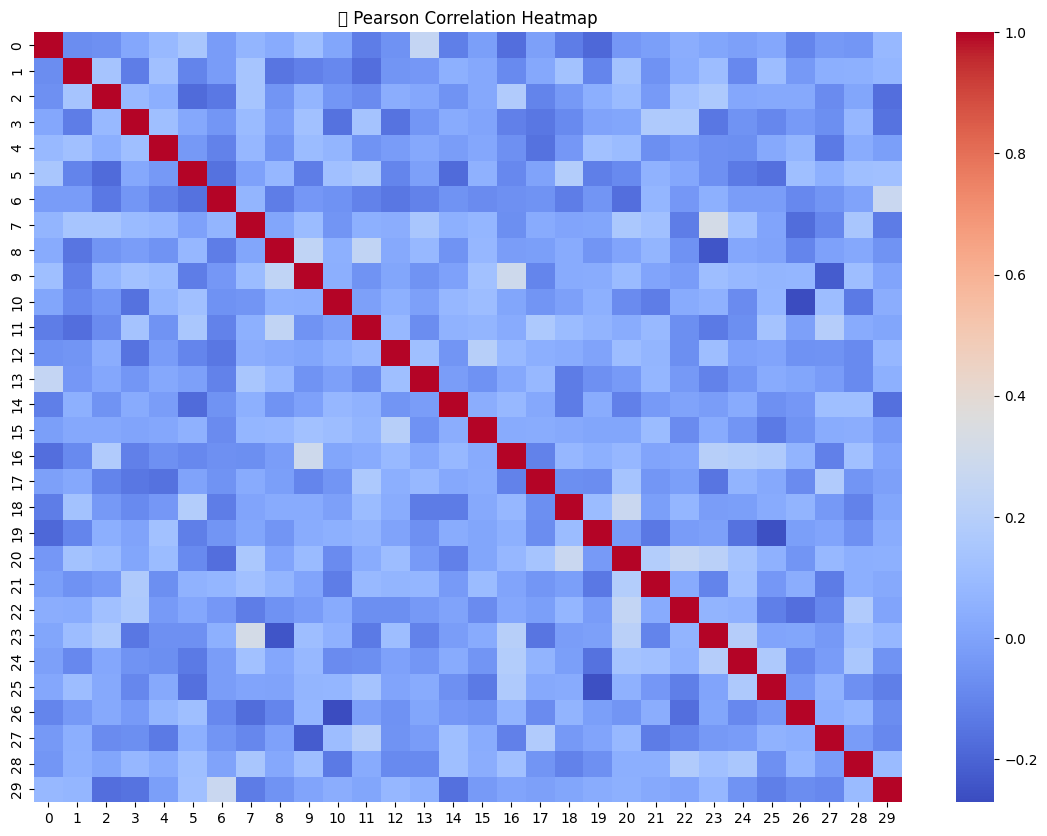

🔹 Columns with correlation ≤ 0.7: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [9]:
corr_matrix = df_filled.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('🔸 Pearson Correlation Heatmap')
plt.show()

selected_cols = [col for col in corr_matrix.columns if all(corr_matrix[col].drop(labels=[col]).abs() <= 0.7)]
print(f"🔹 Columns with correlation ≤ 0.7: {selected_cols}")


In [10]:
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

In [11]:
df_binary = df_normalized.copy()
df_binary[df_binary <= 0.5] = 1
df_binary[df_binary > 0.5] = 0

print("\n🔹 Final binary dataset (first 5 rows):")
print(df_binary.head())


🔹 Final binary dataset (first 5 rows):
    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 30 columns]


##**Q13. Create a random dataset of 500 rows and 10 columns.**
**Columns 1 to 4 are defined between [-10, 10];**

**Columns 5 to 8 are defined between [10, 20];**

**Columns 9 to 10 are defined between [-100, 100].**

**Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.**

**(i) K-Mean clustering**
**(ii) Hierarchical clustering**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [14]:
np.random.seed(42)

part1 = np.random.uniform(-10, 10, size=(500, 4))
part2 = np.random.uniform(10, 20, size=(500, 4))
part3 = np.random.uniform(-100, 100, size=(500, 2))

data = np.hstack((part1, part2, part3))
df = pd.DataFrame(data, columns=[f"col_{i+1}" for i in range(10)])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


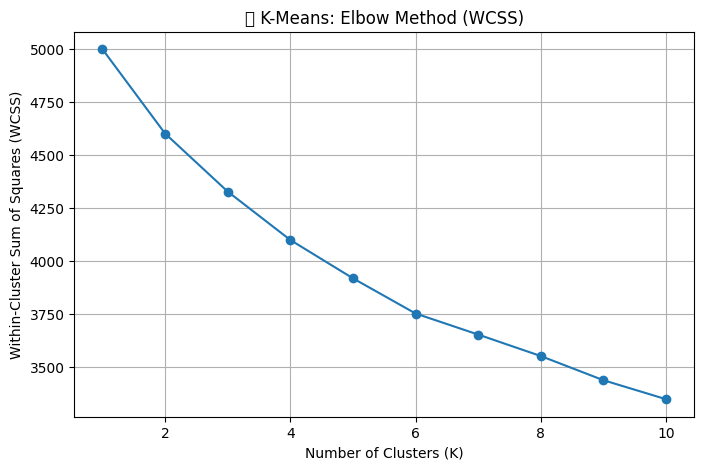

In [15]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("🔸 K-Means: Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


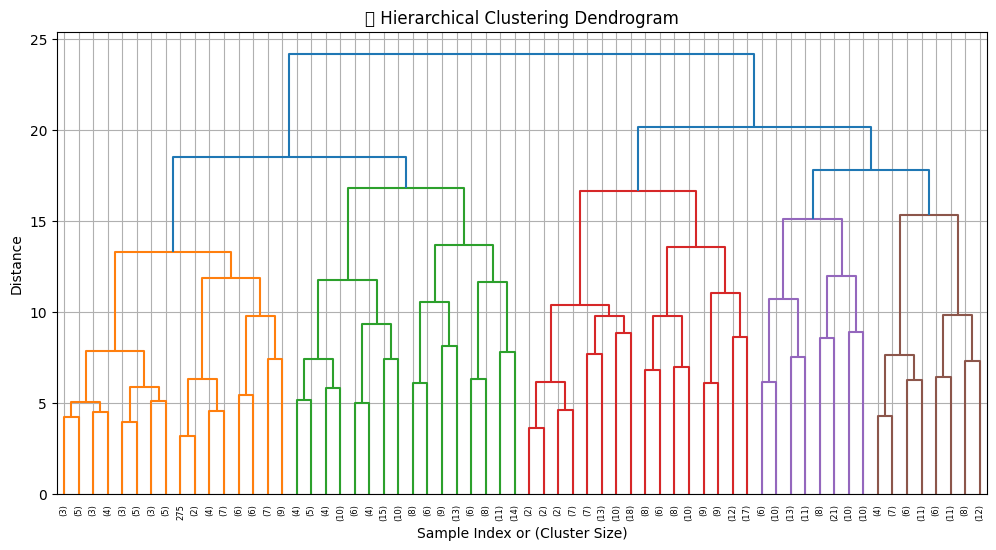

In [16]:
# Use linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("🔸 Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


##**Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].Perform the following operations:**
**(i) Plot scatter graph between Column 5 and Column 6.**

**(ii) Plot histogram of each column in single graph.**

**(iii) Plot the Box plot of each column in single graph.**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
np.random.seed(42)
data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(15)])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


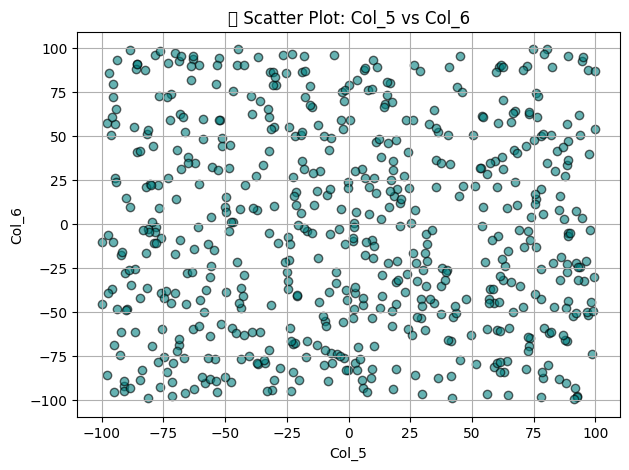

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(df['Col_5'], df['Col_6'], alpha=0.6, color='teal', edgecolor='k')
plt.title('🔸 Scatter Plot: Col_5 vs Col_6')
plt.xlabel('Col_5')
plt.ylabel('Col_6')
plt.grid(True)
plt.show()

/tmp/ipython-input-25-3510095500.py:3: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


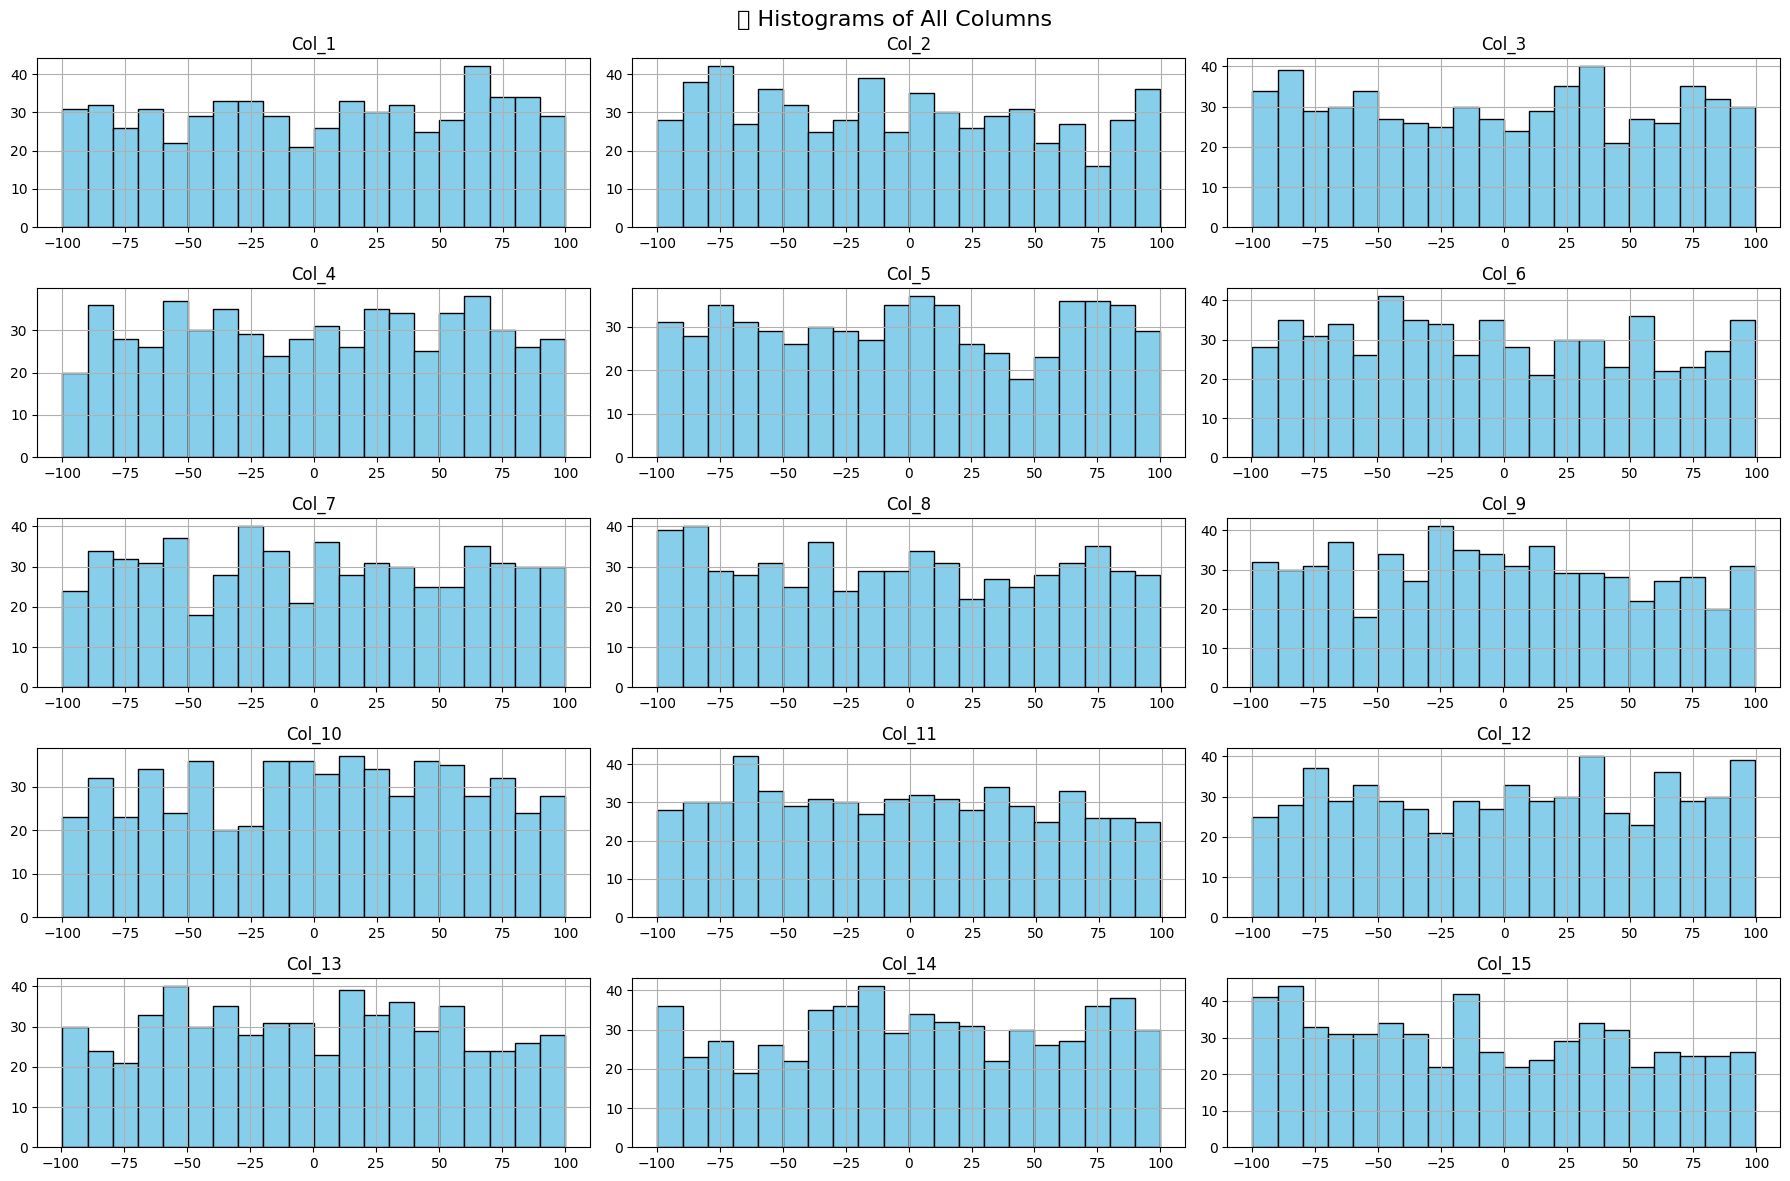

In [25]:
df.hist(bins=20, figsize=(18, 12), edgecolor='black', color='skyblue', layout=(5, 3))
plt.suptitle('🔸 Histograms of All Columns', fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


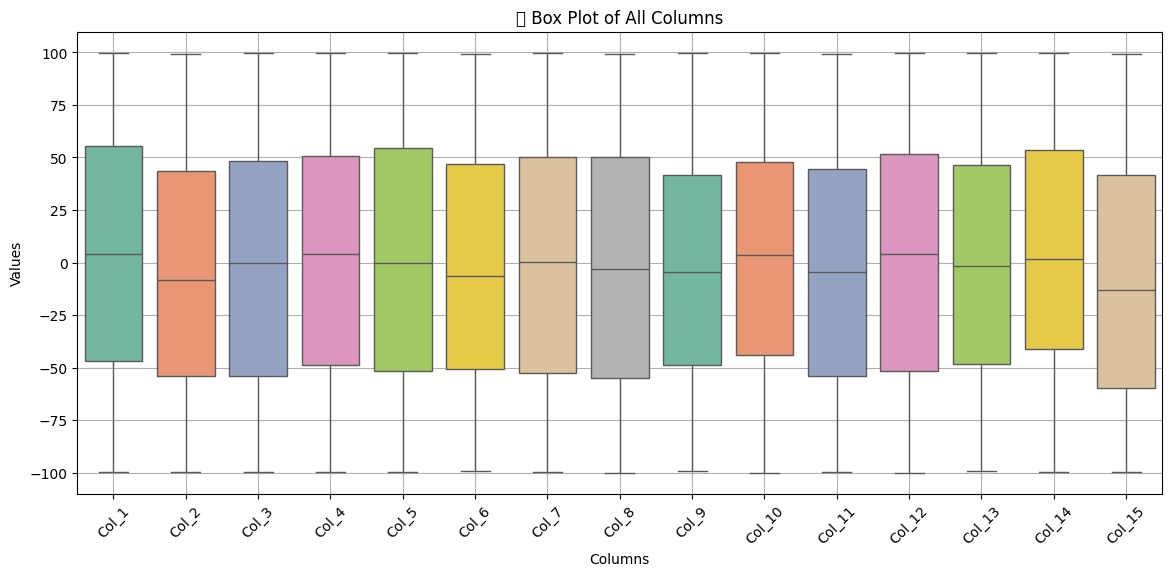

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('🔸 Box Plot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##**Q15. Create a random dataset of 500 rows and 5 columns. All the values are defined between [5,10].Perform the following operations:**

**(i) Perform t-Test on each column.**

**(ii) Perform Wilcoxon Signed Rank Test on each column.**

**(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4**

In [26]:
pip install scipy

In [27]:
import numpy as np
import pandas as pd
from scipy import stats

In [28]:
np.random.seed(42)
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(5)])

print("🔹 Dataset created")

🔹 Dataset created


In [29]:
print("\n🔹 (i) One-Sample t-Test (H0: mean == 7.5):")
for col in df.columns:
    t_stat, p_val = stats.ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")


🔹 (i) One-Sample t-Test (H0: mean == 7.5):
Col_1: t-stat = 0.5041, p-value = 0.6144
Col_2: t-stat = -0.7206, p-value = 0.4715
Col_3: t-stat = 0.0366, p-value = 0.9708
Col_4: t-stat = -0.1038, p-value = 0.9173
Col_5: t-stat = -0.1490, p-value = 0.8816


In [30]:
print("\n🔹 (ii) Wilcoxon Signed-Rank Test (H0: median == 7.5):")
for col in df.columns:
    try:
        w_stat, p_val = stats.wilcoxon(df[col] - 7.5)
        print(f"{col}: W = {w_stat:.4f}, p-value = {p_val:.4f}")
    except ValueError as e:
        print(f"{col}: Skipped (reason: {e})")


🔹 (ii) Wilcoxon Signed-Rank Test (H0: median == 7.5):
Col_1: W = 60997.0000, p-value = 0.6145
Col_2: W = 60213.0000, p-value = 0.4555
Col_3: W = 62434.0000, p-value = 0.9529
Col_4: W = 62199.0000, p-value = 0.8951
Col_5: W = 62175.0000, p-value = 0.8893


In [31]:
print("\n🔹 (iii) Two-Sample t-Test (Col_3 vs Col_4):")
t_stat, p_val = stats.ttest_ind(df['Col_3'], df['Col_4'], equal_var=False)
print(f"t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

print("\n🔹 Wilcoxon Rank-Sum Test (Mann-Whitney U Test):")
u_stat, p_val = stats.mannwhitneyu(df['Col_3'], df['Col_4'], alternative='two-sided')
print(f"U = {u_stat:.4f}, p-value = {p_val:.4f}")


🔹 (iii) Two-Sample t-Test (Col_3 vs Col_4):
t-stat = 0.0999, p-value = 0.9205

🔹 Wilcoxon Rank-Sum Test (Mann-Whitney U Test):
U = 125544.0000, p-value = 0.9053
